# T-test

There are three mains of T-tests
1. An Independent Samples t-test compares the means for two groups.
2. A Paired sample t-test compares means from the same group at different times (say, one year apart).
3. A One sample t-test tests the mean of a single group against a known mean.

**Let us try a 2 independent sample t test**

In [2]:
## Import the packages
import numpy as np
from scipy import stats


## Define 2 random distributions
#Sample Size
N = 100
#Gaussian distributed data with mean = 2 and var = 1
a = np.random.randn(N) + 2
#Gaussian distributed data with with mean = 0 and var = 1
b = np.random.randn(N)
## Exeecute 2 sample t-test
t, p = stats.ttest_ind(a,b)
print("t statistics = " + str(t))
print("p-value = " + str(2*p))

t statistics = 13.9468468994
p-value = 6.06027809185e-31


# Chi-Squared test

There are two types of Chi-Squared test

1. chi-square goodness of fit test: determines if a sample data matches a population
2. chi-square test for independence: compares two variables in a contingency table to see if they are related. In a more general sense, it tests to see whether distributions of categorical variables differ from each another

Here we will be looking into chi-square test for independence

In [11]:
from scipy.stats import chi2_contingency

obs = np.array([[ 7004,   217],
        [ 1591,    11]])
chisquare_test_result =  chi2_contingency(obs)

print('Chi-Square Statistic:' + str(chisquare_test_result[0]))
print('Chi-Square p-value:' + str(chisquare_test_result[1]))
chisquare_test_result

Chi-Square Statistic:27.0830324002
Chi-Square p-value:1.94901148619e-07


(27.083032400233851,
 1.9490114861853126e-07,
 1,
 array([[ 7034.39816389,   186.60183611],
        [ 1560.60183611,    41.39816389]]))

# F-test 

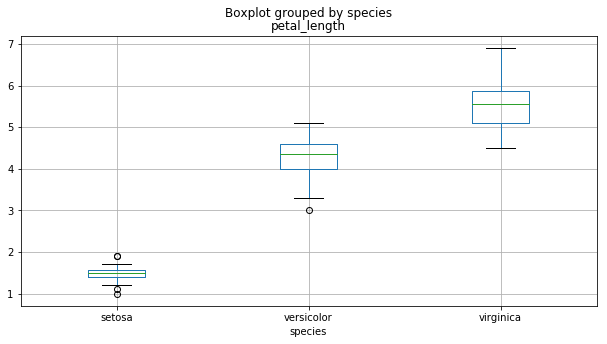

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,5]
iris = sns.load_dataset('iris')
iris.boxplot(column = ['petal_length'],by = 'species')
plt.show() 

In [54]:
from scipy.stats import f_oneway
# oneway(df[''])
iris.drop_duplicates(subset = ['species'])

f, p = stats.f_oneway(iris[iris['species'] == 'setosa'].petal_length,
                      iris[iris['species'] == 'versicolor'].petal_length,
                      iris[iris['species'] == 'virginica'].petal_length)
 
print('f statistic: ' + str(f))
print('p value: ' + str(p) + '\n\n')

from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
mc = MultiComparison(iris['petal_length'], iris['species'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

f statistic: 1180.16118225
p value: 2.85677661096e-91


 Multiple Comparison of Means - Tukey HSD,FWER=0.05
  group1     group2   meandiff lower  upper  reject
---------------------------------------------------
  setosa   versicolor  2.798   2.5942 3.0018  True 
  setosa   virginica    4.09   3.8862 4.2938  True 
versicolor virginica   1.292   1.0882 1.4958  True 
---------------------------------------------------
['setosa' 'versicolor' 'virginica']


So F test shows that there is significant variation in petal_length within plant species. By doing Tukey's HSD test we can see that within ever two speceis there is significant difference in petal length which is leading us to reject f-test's null hypothesis

# Logistic Regression

In [77]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

iris['setosa_fl'] = np.where(iris['species']=='setosa',1,0 )

logitfit = smf.logit(formula = 'setosa_fl~sepal_length', data = iris).fit()
logitfit.summary() 

Optimization terminated successfully.
         Current function value: 0.239455
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              setosa_fl   No. Observations:                  150
Model:                          Logit   Df Residuals:                      148
Method:                           MLE   Df Model:                            1
Date:                Sun, 22 Apr 2018   Pseudo R-squ.:                  0.6238
Time:                        22:07:47   Log-Likelihood:                -35.918
converged:                       True   LL-Null:                       -95.477
                                        LLR p-value:                 9.869e-28
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       27.8285      4.828      5.765      0.000      18.367      37.290
sepal_length    -5.1757      0.893     -5.793      0.000      -6.927      -3.425
================================================================================
"""

# Linear Regression

In [78]:
linreg = smf.ols(formula='sepal_length ~ petal_width', data=iris).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sepal_length   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     299.2
Date:                Sun, 22 Apr 2018   Prob (F-statistic):           2.33e-37
Time:                        22:08:42   Log-Likelihood:                -101.11
No. Observations:                 150   AIC:                             206.2
Df Residuals:                     148   BIC:                             212.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.7776      0.073     65.506      0.000       4.634       4.922
petal_width     0.8886      0.051     17.296      0.000       0.787       0.990
==============================================================================
Omnibus:                        2.390   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.303   Jarque-Bera (JB):                1.939
Skew:                           0.254   Prob(JB):                        0.379
Kurtosis:                       3.229   Cond. No.                         3.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""